## Trade-off Curve Demo

As the trade-off parameter increases, the agent processes more information with a concomitant improvement in performance, which is demonstrated in the plot below.

In [1]:
from env.grid_room import GridRoom
from planning.information_to_go_state import InformationToGoState
from planning.state_distribution import LiveStateDistribution, StationaryStateDistribution, UniformStateDistribution
from utility import display as di

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from time import gmtime, strftime

In [3]:
# environment parameters
shape = (5, 5) # grid world shape
theta = 1e-5   # threshold
epsilon = 0    # degree of twist - not used in this work

In [4]:
# goal = int(np.product(shape)/2)  # middle goal
goal = int(np.product(shape)-1)    # corner goal
print('goal: {}'.format(goal))

goal: 24


In [5]:
# creating the grid world environment according to parameters above
options = {'shape': shape, 'goals': [goal], 'manhattan': True, 'determinism': 1}
env = GridRoom(options)

In [6]:
# choosing a LiveStateDistribution
state_dist = LiveStateDistribution(env)

In [7]:
# setting up the decision information algorithm
ig = InformationToGoState(env, state_dist, theta)

In [8]:
# setting up a range of beta values for the plot
betas = np.logspace(-3, 2.3, num=30)

In [9]:
# calculate the expected information and performance
E_Information, E_Performance = ig.get_trade_off_data(betas);

beta: 0.001
---- performance: 0.00100000  |  information: -6.18389106
beta: 0.001523205926114331
---- performance: 0.00152321  |  information: -6.15914023
beta: 0.0023201562933498187
---- performance: 0.00232016  |  information: -6.14722082
beta: 0.003534075815541904
---- performance: 0.00353408  |  information: -6.13718050
beta: 0.005383125225570771
---- performance: 0.00538313  |  information: -6.12711510
beta: 0.008199608244604943
---- performance: 0.00819961  |  information: -6.11539754
beta: 0.012489691869998182
---- performance: 0.01248969  |  information: -6.09995864
beta: 0.01902437267172322
---- performance: 0.01902437  |  information: -6.07775978
beta: 0.02897803719417635
---- performance: 0.02897804  |  information: -6.04577199
beta: 0.044139517981330936
---- performance: 0.04413952  |  information: -5.99938601
beta: 0.06723357536499339
---- performance: 0.06723358  |  information: -5.93216495
beta: 0.10241058042981246
---- performance: 0.10241058  |  information: -5.8360833

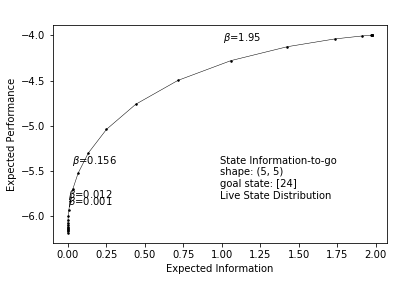

In [10]:
# plot the results
di.plot_trade_off_curve(env, betas, E_Information, E_Performance, ig.name, state_dist.name)